# 3. Field of 8 inclined boreholes with straight trajectories : (b) Convergence of geothermax with regards to the discretization
The convergence of the model is evaluated by comparison with a solution obtained with a fine discretization.

In [1]:
# Import necessary packages
# Import packages for geothermax
import geothermax as gm
from jax import numpy as jnp

# Import packages for visualization
from matplotlib import pyplot as plt
import pandas as pd

### 3(b).1. Simulation parameters

In [2]:
# Borehole dimensions
D = 2.0             # Borehole buried depth (m)
L = 150.0           # Borehole length (m)
r_b = 0.075         # Borehole radius (m)
# Borehole spacings (m), tilt (deg), and inclinations (deg)
B = L * 0.025
tilt = jnp.radians(20.)
orientation = jnp.radians(jnp.array([180., 135., -135., 90., -90., 45., -45, 0.]))

# Pipe dimensions
r_out = 0.0211      # Pipe outer radius (m)
r_in = 0.0147       # Pipe inner radius (m)
D_s = 0.052         # Shank spacing (m)
epsilon = 2.12e-5   # Pipe roughness (m)

# Pipe positions
# Single U-tube : [[x_in, y_in], [x_out, y_out]]
p_pipes = jnp.array([[-D_s, 0.], [D_s, 0.]])

# Ground properties
alpha = 1.0e-6      # Ground thermal diffusivity (m2/s)
k_s = 2.0           # Ground thermal conductivity (W/m.K)

# Grout properties
k_b = 1.0           # Grout thermal conductivity (W/m.K)

# Pipe properties
k_p = 0.4           # Pipe thermal conductivity (W/m.K)

# Fluid properties
m_flow_borehole = 0.375 # Total fluid mass flow rate per borehole (kg/s)
m_flow_network = m_flow_borehole * len(orientation)
# The fluid is propylene-glycol (20 %) at 20 degC
cp_f = 3976.8       # Fluid specific heat capacity (in J/kg-K)
rho_f = 1014.8      # Fluid density (kg/m3)
mu_f = 2.0301e-3    # Fluid dynamic viscosity (kg/m.s)
k_f = 0.49221       # Fluid thermal conductivity (W/m.K)

The convergence of the solution is evaluated near steady-state, at $\ln(t/t_s)=5$.

In [3]:
ts = L**2 / (9 * alpha)    # Bore field characteristic time
lntts = jnp.array([5.])
time = jnp.exp(lntts) * ts

## 3(b).2. Reference solution
The reference solution is evaluated using $S=20$ segments of $N=11$ nodes (220 nodes in total).

In [4]:
N_ref = 11
S_ref = 20

basis = gm.Basis.Legendre(N_ref)
ground_heat_exchanger = gm.UTubeHeatExchanger(
    p_pipes, r_in, r_out, r_b, k_s, k_b, k_p, mu_f, rho_f, k_f, cp_f, epsilon)
R_d = ground_heat_exchanger.thermal_resistances
boreholes = []
for i, _orientation in enumerate(orientation):
    boreholes.append(
        gm.SingleUTube.from_dimensions(
            R_d, L, D, r_b, i * B, 0., basis, S_ref, tilt=tilt, orientation=_orientation))
borefield_reference = gm.Network(boreholes)

The `gFunction` object is initialized and the $g$-function is evaluated.

In [5]:
gfunc_reference = gm.gFunction(borefield_reference, m_flow_network, cp_f, time, alpha, k_s)
gfunc_reference.simulate()

Initialization start.
Completed thermal response factors to nodes. Elapsed time: 9.15 seconds.
Initialization end. Elapsed time: 9.16 seconds.
Simulation start.
Simulation end. Elapsed time: 12.58 seconds.


## 3(b).3. Convergence of geothermax
The solution is evaluated for numbers of segments ranging from $1$ to $5$ and for numbers of nodes per segment ranging from $1$ to $11$.

The `Borefield` objects are first initialized for each discretization.

In [6]:
N_max = 11
S_max = 5
n = 0

borefields = []
for _S in range(1, S_max + 1):
    for _N in range(1, N_max + 1):
        basis = gm.Basis.Legendre(_N)
        boreholes = []
        for i, _orientation in enumerate(orientation):
            boreholes.append(
                gm.SingleUTube.from_dimensions(
                    R_d, L, D, r_b, i * B, 0., basis, _S, tilt=tilt, orientation=_orientation))
        borefields.append(gm.Network(boreholes))

The $g$-functions are then evaluated.

In [7]:
gfunc = [gm.gFunction(borefield, m_flow_network, cp_f, time, alpha, k_s) for borefield in borefields]

Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.41 seconds.
Initialization end. Elapsed time: 8.41 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.30 seconds.
Initialization end. Elapsed time: 8.30 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 10.55 seconds.
Initialization end. Elapsed time: 10.55 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.31 seconds.
Initialization end. Elapsed time: 8.31 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.37 seconds.
Initialization end. Elapsed time: 8.37 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.29 seconds.
Initialization end. Elapsed time: 8.29 seconds.
Initialization start.
Completed thermal response factors to nodes. Elapsed time: 8.21 seconds.
Initialization end. Elapsed time: 8.22 second

In [8]:
for _gfunc in gfunc:
    _gfunc.simulate()
values = jnp.array([_gfunc.g[-1] for _gfunc in gfunc]).reshape(S_max, N_max).T

Simulation start.
Simulation end. Elapsed time: 12.60 seconds.
Simulation start.
Simulation end. Elapsed time: 13.25 seconds.
Simulation start.
Simulation end. Elapsed time: 13.67 seconds.
Simulation start.
Simulation end. Elapsed time: 12.94 seconds.
Simulation start.
Simulation end. Elapsed time: 12.68 seconds.
Simulation start.
Simulation end. Elapsed time: 12.55 seconds.
Simulation start.
Simulation end. Elapsed time: 13.44 seconds.
Simulation start.
Simulation end. Elapsed time: 13.04 seconds.
Simulation start.
Simulation end. Elapsed time: 13.58 seconds.
Simulation start.
Simulation end. Elapsed time: 13.16 seconds.
Simulation start.
Simulation end. Elapsed time: 22.93 seconds.
Simulation start.
Simulation end. Elapsed time: 11.39 seconds.
Simulation start.
Simulation end. Elapsed time: 11.34 seconds.
Simulation start.
Simulation end. Elapsed time: 10.95 seconds.
Simulation start.
Simulation end. Elapsed time: 10.76 seconds.
Simulation start.
Simulation end. Elapsed time: 11.11 s

In [9]:
# Format and print dataframe
df = pd.DataFrame(
    values,
    columns=[f'S = {_S}' for _S in jnp.arange(1, S_max + 1)],
    index=jnp.arange(1, N_max + 1))
df.index.name = 'N'
df.style.set_caption(r'$g$-Function at $ln(t/t_s)=5$') 

,S = 1,S = 2,S = 3,S = 4,S = 5
N,,,,,
1,12.869989,12.297009,12.079844,11.957014,11.875275
2,12.084941,11.808675,11.708837,11.656541,11.623466
3,11.811337,11.657561,11.603532,11.574361,11.557339
4,11.688239,11.591563,11.557912,11.542285,11.534644
5,11.622024,11.558988,11.538386,11.530087,11.526011
6,11.584893,11.541692,11.528884,11.523858,11.521099
7,11.562249,11.532372,11.523662,11.520150,11.517901
8,11.548530,11.526523,11.520238,11.517505,11.515525
9,11.539731,11.522573,11.517812,11.515479,11.513633


The relative error is calculated from the difference between the solution and the reference:
$$
\varepsilon_{rel} = \frac{g - g_{ref}}{g_{ref}}
$$

In [10]:
error = (jnp.array([_gfunc.g[-1] for _gfunc in gfunc]).reshape(S_max, N_max).T - gfunc_reference.g[-1]) / gfunc_reference.g[-1]

In [11]:
# Format and print dataframe
df = pd.DataFrame(
    error,
    columns=[f'S = {_S}' for _S in jnp.arange(1, S_max + 1)],
    index=jnp.arange(1, N_max + 1))
df.index.name = 'N'
df.style.set_caption(r'Relative error on the $g$-function at $ln(t/t_s)=5$') 

,S = 1,S = 2,S = 3,S = 4,S = 5
N,,,,,
1,0.118446,0.068652,0.049780,0.039106,0.032002
2,0.050223,0.026215,0.017538,0.012994,0.010119
3,0.026446,0.013082,0.008387,0.005852,0.004373
4,0.015748,0.007347,0.004422,0.003064,0.002400
5,0.009994,0.004516,0.002726,0.002004,0.001650
6,0.006767,0.003013,0.001900,0.001463,0.001223
7,0.004799,0.002203,0.001446,0.001141,0.000945
8,0.003607,0.001695,0.001148,0.000911,0.000739
9,0.002842,0.001351,0.000938,0.000735,0.000574


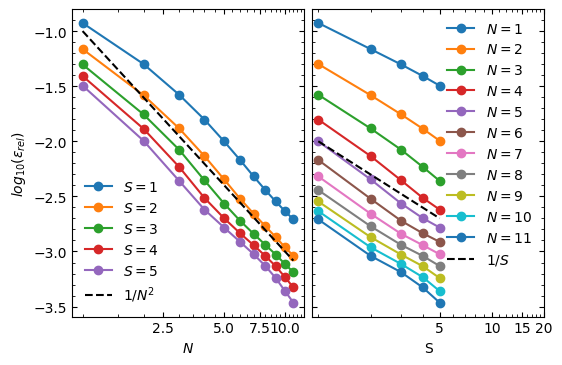

In [12]:
# Plot error as function of N and S
fig, axs = plt.subplots(ncols=2, sharey=True, layout='constrained')

N = jnp.arange(1, N_max + 1)
S = jnp.arange(1, S_max + 1)

axs[0].set_xscale('function', functions=(lambda x: jnp.log(x), lambda x: jnp.exp(x)))
axs[0] = gm.utilities._format_axis(axs[0], axis_labels=[r'$N$', r'$log_{10}(\varepsilon_{rel})$'])
axs[0].plot(N, jnp.log10(error), '-o');
axs[0].plot(N, jnp.log10(0.1 / N**2), 'k--');
axs[0].legend([f'$S={_S}$' for _S in S] + [r'$1 / N^2$'], frameon=False)

axs[1].set_xscale('function', functions=(lambda x: jnp.log(x), lambda x: jnp.exp(x)))
axs[1] = gm.utilities._format_axis(axs[1])
axs[1].set_xlabel(r'S')
axs[1].plot(S, jnp.log10(error.T), '-o');
axs[1].plot(S, jnp.log10(0.01 / S), 'k--');
axs[1].set_xlim(None, 20)
axs[1].legend([f'$N={_N}$' for _N in N] + [r'$1 / S$'], frameon=False)

fig.set_size_inches(140. / 25.4, 90. / 25.4)
fig.savefig('convergence-Eskilson-optimal.eps')